In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_pickle('/home/michael/fantasy_basketball_project/s1Validated.pkl')
aggdf = pd.read_pickle('//home/michael/fantasy_basketball_project/s1Summary.pkl')

In [45]:
df.head()

,pos,player_team_status_pos,opp,result,MIN,REB,AST,STL,BLK,PTS,PR15,%ROST,+/-,team_id,scoring_period,date,name,validSlot
2,G,Kris DunnOChiPG,Atl,L 118-123,27.0,4.0,6.0,2.0,0.0,14.0,-5.20,50.8,-1.1,1,139,2019-03-03,Kris Dunn,True
4,F,"Jerami GrantOKCSF, PF",Mem,W 99-95,37.0,7.0,5.0,0.0,1.0,13.0,4.03,71.8,1.9,1,139,2019-03-03,Jerami Grant,True
5,F,PJ TuckerHouSF,@Bos,W 115-104,40.0,8.0,1.0,1.0,1.0,9.0,0.81,6.4,-1.6,1,139,2019-03-03,PJ,True
17,G,Kemba WalkerFAPG,NaN,NaN,39.0,0.0,12.0,0.0,0.0,18.0,7.08,99.9,0.0,2,139,2019-03-03,Kemba Walker,True
20,F,Lauri MarkkanenChiPF,Atl,L 118-123,29.0,9.0,3.0,2.0,0.0,19.0,NaN,69.4,-1.4,2,139,2019-03-03,Lauri Markkanen,True


In [8]:
aggdf['reb/fpts'] = aggdf['REB'] / aggdf['REBFPts']
aggdf['ast/fpts'] = aggdf['AST'] / aggdf['ASTFPts']
aggdf['stl/fpts'] = aggdf['STL'] / aggdf['STLFPts']
aggdf['blk/fpts'] = aggdf['BLK'] / aggdf['BLKFPts']
aggdf['pts/fpts'] = aggdf['PTS'] / aggdf['PTSFPts']

In [9]:
aggdf

,team_id,REB,AST,STL,BLK,PTS,REBFPts,ASTFPts,STLFPts,BLKFPts,PTSFPts,TotalFPts,reb/fpts,ast/fpts,stl/fpts,blk/fpts,pts/fpts
0,1,6050.0,3623.0,959.0,697.0,13783.0,6.0,5.0,5.0,4.0,2.0,22.0,1008.333333,724.600000,191.800000,174.250000,6891.500000
1,2,6022.0,3021.0,974.0,776.0,16746.0,5.0,1.0,6.0,6.0,6.0,24.0,1204.400000,3021.000000,162.333333,129.333333,2791.000000
2,3,5967.0,3865.0,909.0,735.0,15044.0,4.0,6.0,3.0,5.0,3.0,21.0,1491.750000,644.166667,303.000000,147.000000,5014.666667
3,4,5960.0,3467.0,943.0,648.0,15245.0,3.0,4.0,4.0,2.0,4.0,17.0,1986.666667,866.750000,235.750000,324.000000,3811.250000
4,5,5597.0,3228.0,849.0,689.0,15474.0,2.0,3.0,2.0,3.0,5.0,15.0,2798.500000,1076.000000,424.500000,229.666667,3094.800000
5,6,5023.0,3027.0,702.0,410.0,12534.0,1.0,2.0,1.0,1.0,1.0,6.0,5023.000000,1513.500000,702.000000,410.000000,12534.000000


In [37]:
maxDict = dict(aggdf.iloc[:5].max()[['REB','AST','STL','BLK','PTS']])
maxDict = {k: maxDict[k] / 6 for k in maxDict}
maxDict

{'REB': 1008.3333333333334,
 'AST': 644.1666666666666,
 'STL': 162.33333333333334,
 'BLK': 129.33333333333334,
 'PTS': 2791.0}

In [36]:
medDict = dict(aggdf.iloc[:5].median()[['REB','AST','STL','BLK','PTS']])
medDict = {k: medDict[k] / 4 for k in medDict}
medDict

{'REB': 1491.75, 'AST': 866.75, 'STL': 235.75, 'BLK': 174.25, 'PTS': 3811.25}

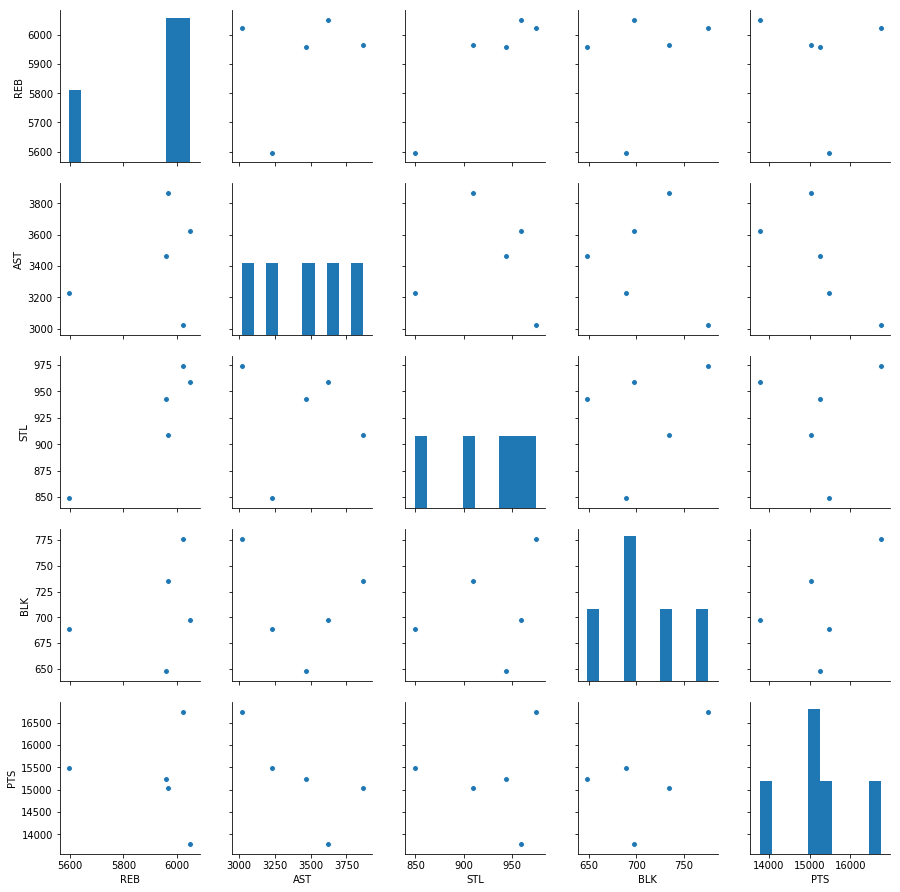

In [15]:
sns.pairplot(aggdf[['REB','AST','STL','BLK','PTS']].iloc[:5]);

In [65]:
player_total_df = df.groupby(['name'])['REB','AST','STL','BLK','PTS'].sum()

In [66]:
med_total_df = player_total_df.copy(deep=True)
med_total_df['medFptReb'] = med_total_df['REB'] / medDict['REB']
med_total_df['medFptAst'] = med_total_df['AST'] / medDict['AST']
med_total_df['medFptStl'] = med_total_df['STL'] / medDict['STL']
med_total_df['medFptBlk'] = med_total_df['BLK'] / medDict['BLK']
med_total_df['medFptPts'] = med_total_df['PTS'] / medDict['PTS']
med_total_df['medTotalFpt']  = med_total_df['medFptReb'] + med_total_df['medFptAst'] + med_total_df['medFptStl'] + med_total_df['medFptBlk'] + med_total_df['medFptPts']

In [67]:
med_total_df.sort_values('medTotalFpt', ascending=False)

,REB,AST,STL,BLK,PTS,medFptReb,medFptAst,medFptStl,medFptBlk,medFptPts,medTotalFpt
name,,,,,,,,,,,
James Harden,486.0,566.0,154.0,56.0,2723.0,0.325792,0.653014,0.653234,0.321377,0.714464,2.667881
Andre Drummond,1182.0,111.0,133.0,134.0,1320.0,0.792358,0.128065,0.564157,0.769010,0.346343,2.599933
Giannis Antetokounmpo,876.0,415.0,91.0,102.0,1919.0,0.587230,0.478800,0.386002,0.585366,0.503509,2.540907
Ben Simmons,697.0,609.0,112.0,61.0,1337.0,0.467236,0.702625,0.475080,0.350072,0.350804,2.345816
Russell Westbrook,677.0,635.0,124.0,30.0,1422.0,0.453829,0.732622,0.525981,0.172166,0.373106,2.257705
Rudy Gobert,927.0,148.0,59.0,159.0,1108.0,0.621418,0.170753,0.250265,0.912482,0.290718,2.245636
Anthony Davis,662.0,217.0,87.0,134.0,1440.0,0.443774,0.250361,0.369035,0.769010,0.377829,2.210008
Joel Embiid,853.0,226.0,44.0,117.0,1717.0,0.571812,0.260744,0.186638,0.671449,0.450508,2.141152
Nikola Jokic,744.0,522.0,94.0,46.0,1393.0,0.498743,0.602250,0.398727,0.263989,0.365497,2.129206


In [69]:
max_total_df = player_total_df.copy(deep=True)
max_total_df['maxFptReb'] = max_total_df['REB'] / maxDict['REB']
max_total_df['maxFptAst'] = max_total_df['AST'] / maxDict['AST']
max_total_df['maxFptStl'] = max_total_df['STL'] / maxDict['STL']
max_total_df['maxFptBlk'] = max_total_df['BLK'] / maxDict['BLK']
max_total_df['maxFptPts'] = max_total_df['PTS'] / maxDict['PTS']
max_total_df['maxTotalFpt']  = max_total_df['maxFptReb'] + max_total_df['maxFptAst'] + max_total_df['maxFptStl'] + max_total_df['maxFptBlk'] + max_total_df['maxFptPts']

In [72]:
max_total_df.sort_values('maxTotalFpt', ascending=False).head(100)

,REB,AST,STL,BLK,PTS,maxFptReb,maxFptAst,maxFptStl,maxFptBlk,maxFptPts,maxTotalFpt
name,,,,,,,,,,,
James Harden,486.0,566.0,154.0,56.0,2723.0,0.481983,0.878655,0.948665,0.432990,0.975636,3.717929
Andre Drummond,1182.0,111.0,133.0,134.0,1320.0,1.172231,0.172316,0.819302,1.036082,0.472949,3.672880
Giannis Antetokounmpo,876.0,415.0,91.0,102.0,1919.0,0.868760,0.644243,0.560575,0.788660,0.687567,3.549805
Ben Simmons,697.0,609.0,112.0,61.0,1337.0,0.691240,0.945408,0.689938,0.471649,0.479040,3.277275
Russell Westbrook,677.0,635.0,124.0,30.0,1422.0,0.671405,0.985770,0.763860,0.231959,0.509495,3.162489
Rudy Gobert,927.0,148.0,59.0,159.0,1108.0,0.919339,0.229754,0.363450,1.229381,0.396990,3.138915
Anthony Davis,662.0,217.0,87.0,134.0,1440.0,0.656529,0.336869,0.535934,1.036082,0.515944,3.081359
Joel Embiid,853.0,226.0,44.0,117.0,1717.0,0.845950,0.350841,0.271047,0.904639,0.615192,2.987669
Nikola Jokic,744.0,522.0,94.0,46.0,1393.0,0.737851,0.810349,0.579055,0.355670,0.499104,2.982030
